# R2X: Plexos & Sienna Comparison

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
colors_fuel = {
    "Natural gas": "#800080",
    "Hydropower": "#1f77b4",
    "Wind": "#87ceeb", 
    "Biopower": "#228b22",
    "Geothermal": "#8b4513",   
    "PV": "#ffd700",          
    "Batteries": "#5dbb26",  
    "Battery_Charge": "#5dbb26",
    "Battery_Discharge": "#5dbb26",
    "Petroleum": "#333333", 
    "Other": "#bcbd22",     
    "Unserved Energy": "#ff0000", 
    "Curtailment": "#ff6347", 
    "Over Generation": "#00ff00",
}

fuel_name_mapper = { # Maps fuel names/ PM names to the fuel names used in Sienna data
    'OIL': 'Petroleum',
    'OTHER': 'Other',
    'HY': 'Hydropower',
    'WT': 'Wind',
    'WOOD_WASTE': 'Biopower',
    'WASTE_HEAT': 'Other',
    'GEOTHERMAL': 'Geothermal',
    'GAS': 'Natural gas',
    'PV': 'PV',
    'BA': 'Batteries',
    'HYDROGEN': 'Other',
}


## Generation Comparison

In [3]:
# Load Generator Fuel Mapping File
r2x_output_path = Path('/Users/kamrantehranchi/Local_Documents/FPA_Sienna/Projects/NVE/output')
gen_properties = pd.read_csv(r2x_output_path / 'gen.csv', index_col=0)
gen_properties.columns
gen_properties['fuel_type'] = gen_properties.fuel.fillna(gen_properties.prime_mover_type)
gen_properties['fuel_name'] = gen_properties.fuel_type.map(fuel_name_mapper)
print(gen_properties.fuel_name.unique())
print(gen_properties.fuel_type.unique())

['Geothermal' 'Natural gas' 'Other' 'Petroleum' 'Wind' 'PV' 'Batteries'
 'Hydropower']
['GEOTHERMAL' 'GAS' 'OTHER' 'OIL' 'WT' 'PV' 'BA' 'HY']


In [4]:
# Read Plexos Results
plexos_results_path = Path('/Users/kamrantehranchi/Local_Documents/FPA_Sienna/Projects/NVE/PLEXOS ST Results NVE 7_19_24.xlsx')
df_plexos_generation = pd.read_excel(plexos_results_path, sheet_name='Generation')
df_plexos_generation.drop(columns=[	"Parent Name", "Collection", "Property", "Band", "Units"], inplace=True)
df_plexos_generation.rename(columns={"Datetime": "DateTime"}, inplace=True)
df_plexos_generation.set_index('DateTime', inplace=True)

df_plexos_storage = pd.read_excel(plexos_results_path, sheet_name='Net_Gen (stor)')
df_plexos_storage.drop(columns=[	"Parent Name", "Collection", "Property", "Band", "Units"], inplace=True)
df_plexos_storage.rename(columns={"Datetime": "DateTime"}, inplace=True)
df_plexos_storage.set_index('DateTime', inplace=True)

df_plexos_generation = pd.concat([df_plexos_generation, df_plexos_storage], axis=1)

df_plexos_generation.head(5)

,Chuck Lenzi 1_A,Chuck Lenzi 1_B,Chuck Lenzi 2_A,Chuck Lenzi 2_B,"Clark 5, 6, 10_A","Clark 5, 6, 10_B","Clark 7, 8, 9_A","Clark 7, 8, 9_B",Harry Allen CC_A,Harry Allen CC_B,...,Battle Mountain Solar BESS,Boulder Solar III BESS,Dodge Flat Solar BESS,Dry Lake East Solar BESS,Dry Lake Solar BESS,Fish Springs Ranch Solar BESS,Gemini Solar BESS,Libra Solar BESS,Sierra Solar BESS,Sierra Solar II BESS
DateTime,,,,,,,,,,,,,,,,,,,,,
2030-01-01 00:00:00,0.0,263.0,248.636,263.000,0.0,0.0,0.0,0.0,250.875,290.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0
2030-01-01 01:00:00,0.0,263.0,214.500,263.000,0.0,0.0,0.0,0.0,250.875,250.875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0
2030-01-01 02:00:00,0.0,263.0,214.500,263.000,0.0,0.0,0.0,0.0,250.875,250.875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0
2030-01-01 03:00:00,0.0,263.0,214.500,242.977,0.0,0.0,0.0,0.0,250.875,250.875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0
2030-01-01 04:00:00,0.0,263.0,263.000,263.000,0.0,0.0,0.0,0.0,290.000,290.000,...,0.0,0.0,0.0,0.0,0.0,0.0,122.033,0.0,307.035,0.0


/var/folders/00/vqry7y9s78q3rvf_m_jmk_bc0000gn/T/ipykernel_76266/2145290483.py:1: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_plexos_gen_by_fuel = df_plexos_generation.groupby(gen_properties.fuel_name, axis =1).sum()


<Axes: xlabel='DateTime'>

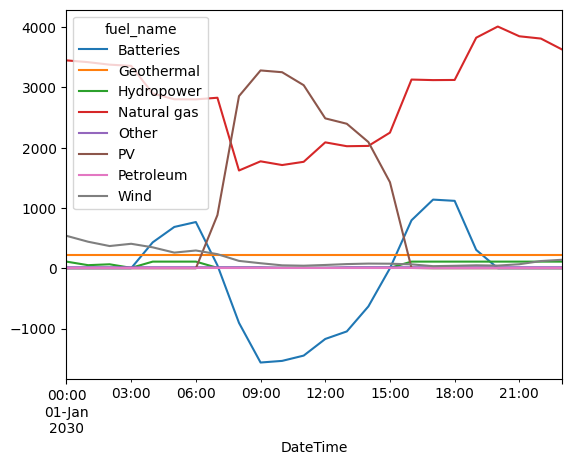

In [5]:
# Group plexos results by fuel type
df_plexos_gen_by_fuel = df_plexos_generation.groupby(gen_properties.fuel_name, axis =1).sum()
df_plexos_gen_by_fuel.head(24).plot()

In [6]:
# Read Sienna Resuts
sienna_results_folder = Path('/Users/kamrantehranchi/Local_Documents/FPA_Sienna/Projects/NVE/sienna_runs/run_output/results')
df_gen_active_power = pd.read_csv(sienna_results_folder / 'generator_active_power.csv')
df_gen_by_fuel = pd.read_csv(sienna_results_folder / 'generation_by_fuel.csv')
df_gen_active_power['DateTime'] = pd.to_datetime(df_gen_active_power['DateTime'])
df_gen_active_power.set_index('DateTime', inplace=True)
df_gen_by_fuel.index = df_gen_active_power.index
df_gen_by_fuel.head(5)

,Unserved Energy,Petroleum,Other,Wind,Geothermal,PV,Curtailment,Natural gas,Hydropower,Over Generation
DateTime,,,,,,,,,,
2030-01-01 00:00:00,0.0,0.0,0.0,538.927074,282.25,0.0,0.000000e+00,3405.712926,111.0,0.0
2030-01-01 01:00:00,0.0,0.0,0.0,441.213188,282.25,0.0,5.684342e-14,3099.606812,111.0,0.0
2030-01-01 02:00:00,0.0,0.0,0.0,369.354966,282.25,0.0,0.000000e+00,3263.895034,111.0,0.0
2030-01-01 03:00:00,0.0,0.0,0.0,406.914254,282.25,0.0,5.684342e-14,3200.575746,111.0,0.0
2030-01-01 04:00:00,0.0,0.0,0.0,347.742956,282.25,0.0,0.000000e+00,3225.767044,111.0,0.0


In [7]:
def add_missing_carriers(df1, df2):
    for carrier in df1.columns:
        if carrier not in df2.columns:
            df2[carrier] = 0
    for carrier in df2.columns:
        if carrier not in df1.columns:
            df1[carrier] = 0
    return df1, df2

In [8]:
plexos = df_plexos_gen_by_fuel.loc[df_gen_by_fuel.index].copy()
sienna = df_gen_by_fuel.clip(lower=0) # clip small negative curtailment values
 
COLUMN_ORDER = ['Geothermal', 'Biopower', 'Hydropower', 'Petroleum', 'Other', 'Wind', 'PV', 'Natural gas','Unserved Energy', 'Curtailment', 'Over Generation', 'Batteries']

plexos = plexos.reindex(columns=COLUMN_ORDER)
sienna = sienna.reindex(columns=COLUMN_ORDER)

plexos.head(5)

fuel_name,Geothermal,Biopower,Hydropower,Petroleum,Other,Wind,PV,Natural gas,Unserved Energy,Curtailment,Over Generation,Batteries
DateTime,,,,,,,,,,,,
2030-01-01 00:00:00,219.086,NaN,111.000,0.0,18.0,538.927,0.0,3449.488,NaN,NaN,NaN,1.388
2030-01-01 01:00:00,219.086,NaN,52.053,0.0,18.0,441.213,0.0,3420.187,NaN,NaN,NaN,2.000
2030-01-01 02:00:00,219.086,NaN,66.581,0.0,18.0,369.355,0.0,3378.578,NaN,NaN,NaN,2.000
2030-01-01 03:00:00,219.086,NaN,7.634,0.0,18.0,406.914,0.0,3358.855,NaN,NaN,NaN,2.000
2030-01-01 04:00:00,219.086,NaN,111.000,0.0,18.0,347.743,0.0,2899.922,NaN,NaN,NaN,431.068


In [9]:
sienna.head(5)

,Geothermal,Biopower,Hydropower,Petroleum,Other,Wind,PV,Natural gas,Unserved Energy,Curtailment,Over Generation,Batteries
DateTime,,,,,,,,,,,,
2030-01-01 00:00:00,282.25,NaN,111.0,0.0,0.0,538.927074,0.0,3405.712926,0.0,0.000000e+00,0.0,NaN
2030-01-01 01:00:00,282.25,NaN,111.0,0.0,0.0,441.213188,0.0,3099.606812,0.0,5.684342e-14,0.0,NaN
2030-01-01 02:00:00,282.25,NaN,111.0,0.0,0.0,369.354966,0.0,3263.895034,0.0,0.000000e+00,0.0,NaN
2030-01-01 03:00:00,282.25,NaN,111.0,0.0,0.0,406.914254,0.0,3200.575746,0.0,5.684342e-14,0.0,NaN
2030-01-01 04:00:00,282.25,NaN,111.0,0.0,0.0,347.742956,0.0,3225.767044,0.0,0.000000e+00,0.0,NaN


/Users/kamrantehranchi/miniforge3/envs/r2x/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1794: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(None, 0)


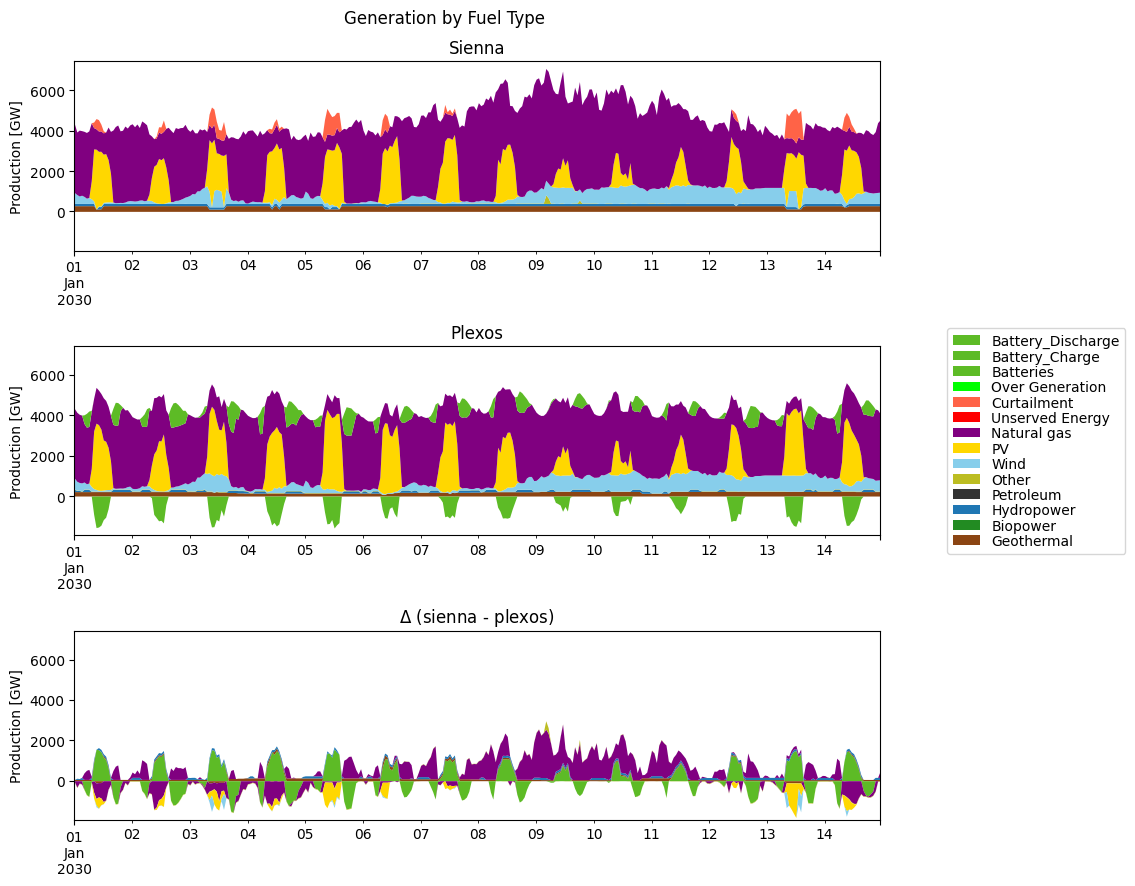

In [10]:
title='Generation by Fuel Type'; save_path='validation/generation_by_fuel.png'; colors=colors_fuel

df_gen_by_fuel.Curtailment = df_gen_by_fuel.Curtailment.clip(lower=0) # clip small negative curtailment values
sienna = df_gen_by_fuel
plexos = df_plexos_gen_by_fuel.loc[df_gen_by_fuel.index].copy()
 
COLUMN_ORDER = ['Geothermal', 'Biopower', 'Hydropower', 'Petroleum', 'Other', 'Wind', 'PV', 'Natural gas','Unserved Energy', 'Curtailment', 'Over Generation', 'Batteries']

plexos = plexos.reindex(columns=COLUMN_ORDER)
sienna = sienna.reindex(columns=COLUMN_ORDER)

plexos['Battery_Charge'] = plexos['Batteries'].clip(upper=0)
plexos['Battery_Discharge'] = plexos['Batteries'].clip(lower=0)
plexos.drop(columns='Batteries', inplace=True)

plexos, sienna = add_missing_carriers(plexos, sienna)
kwargs = dict(color=colors, ylabel="Production [GW]", xlabel="", linewidth=0)

fig, axes = plt.subplots(3, 1, figsize=(9, 9))

sienna_resampled = sienna#.resample("1D").mean()
sienna_resampled.plot.area(
    ax=axes[0],
    **kwargs,
    legend=False,
    title="Sienna",
)
order = sienna_resampled.columns

plexos_resampled = plexos#.resample("1D").mean()[order]
plexos_resampled.plot.area(
    ax=axes[1],
    **kwargs,
    legend=False,
    title="Plexos",
)

diff = (sienna - plexos).fillna(0)#.resample("1D").mean()
diff.clip(lower=0).plot.area(
    ax=axes[2],
    title=r"$\Delta$ (sienna - plexos)",
    legend=False,
    **kwargs,
)
diff.clip(upper=0).plot.area(ax=axes[2], **kwargs, legend=False)

lower_lim = min(axes[0].get_ylim()[0], axes[1].get_ylim()[0], axes[2].get_ylim()[0])
upper_lim = max(axes[0].get_ylim()[1], axes[1].get_ylim()[1], axes[2].get_ylim()[1])
axes[0].set_ylim(bottom=lower_lim, top=upper_lim)
axes[1].set_ylim(bottom=lower_lim, top=upper_lim)

# Set the limits for the difference subplot
diff_lim_upper = diff.clip(lower=0).sum(axis=1).max()
diff_lim_lower = diff.clip(upper=0).sum(axis=1).min()
axes[2].set_ylim(
    bottom=min(lower_lim, diff_lim_lower),
    top=max(upper_lim, diff_lim_upper),
)

h, l = axes[0].get_legend_handles_labels()
fig.legend(
    h[::-1],
    l[::-1],
    loc="center left",               # Aligns the legend to the left of the bounding box
    bbox_to_anchor=(1.05, 0.5),      # 1.05 moves it slightly outside the plot, 0.5 centers it vertically
    ncol=1,
    frameon=True,
    labelspacing=0.1,
)

plt.suptitle(title)
fig.tight_layout()
fig.savefig(save_path, dpi=300)

## Demand Comparison

,Nevada Power,Northern Purchases (Sierra),Sierra,Southern Purchases (NVP)
DateTime,,,,
s,2505.00,0,1832.89,0
2030-01-01 01:00:00,2379.29,0,1773.25,0
2030-01-01 02:00:00,2319.46,0,1734.14,0
2030-01-01 03:00:00,2288.37,0,1724.12,0
2030-01-01 04:00:00,2295.62,0,1731.20,0
2030-01-01 05:00:00,2343.76,0,1755.66,0
2030-01-01 06:00:00,2393.47,0,1820.86,0
2030-01-01 07:00:00,2362.31,0,1880.15,0
2030-01-01 08:00:00,2074.22,0,1867.07,0


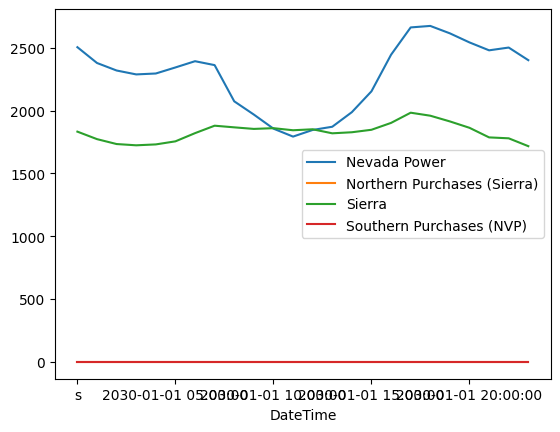

In [19]:
# Read Plexos Results
plexos_results_path = Path('/Users/kamrantehranchi/Local_Documents/FPA_Sienna/Projects/NVE/PLEXOS ST Results NVE 7_19_24.xlsx')
df_plexos_load = pd.read_excel(plexos_results_path, sheet_name='Native Load')
df_plexos_load.drop(columns=[	"Parent Name", "Collection", "Property", "Band", "Units"], inplace=True)
df_plexos_load.rename(columns={"Datetime": "DateTime"}, inplace=True)
df_plexos_load.set_index('DateTime', inplace=True)
df_plexos_load.head(24).plot()

df_plexos_load.head(24)

,DateTime,Nevada Power,Sierra
0,,2505.00,1832.89
1,,2275.73,1658.34
2,,2319.50,1707.00
3,,2236.29,1764.45
4,,2266.19,1700.57
5,,2272.67,1638.03
6,,2256.99,1732.74
7,,2553.12,1837.06
8,,2377.82,1772.81
9,,2361.98,1730.12


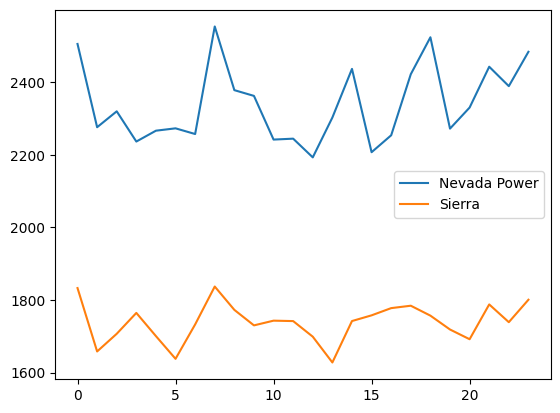

In [23]:
# Read Sienna Demand
df_demand = pd.read_csv(sienna_results_folder / 'load_active_power.csv') *-1

df_demand.head(24).plot()
df_demand.head(24)

In [22]:
df_demand_r2x = pd.read_csv('/Users/kamrantehranchi/Local_Documents/FPA_Sienna/Projects/NVE/output/Data/PowerLoad_max_active_power__2030.csv')
df_demand_r2x['Nevada Power'] = df_demand_r2x['Nevada Power'] * 7116.95
df_demand_r2x['Sierra'] = df_demand_r2x['Sierra'] * 3071.5
df_demand_r2x.head(5)

,DateTime,Sierra,Nevada Power
0,2030-01-01T00:00,1832.89,2505.00
1,2030-01-01T01:00,1658.34,2275.73
2,2030-01-01T02:00,1707.00,2319.50
3,2030-01-01T03:00,1764.45,2236.29
4,2030-01-01T04:00,1700.57,2266.19
